# Data: Past, Present, Future |  Lab 4  |  2/14/2019


## describing and predicting: Galton, regression, inventing error, survival curves, smoothing, 

# Galton and regression

Galton's analysis "gives the numerical value of the regression towards mediocrity in the case of human stature, as from 1 to 2/3 with unexpected coherence and precision [see Plate IX, fig. (a)]"

![Plate_9](https://www.researchgate.net/profile/Yeming_Ma2/publication/280970132/figure/fig1/AS:284517131669510@1444845578444/Rate-of-regression-in-hereditary-stature-Galton-1886-Plate-IX-fig-a-The-short_Q320.jpg)

The paper can be found at:

http://www.stat.ucla.edu/~nchristo/statistics100C/history_regression.pdf

Download it and follow along!

## Galton's data 

![galton_notebook](http://www.medicine.mcgill.ca/epidemiology/hanley/galton/notebook/images/1_page_1.jpg)
(h/t http://www.medicine.mcgill.ca/epidemiology/hanley/galton/)


Let's use some of Galton's data from his study exploring the relationship between the heights of adult children and the heights of their parents. The data includes the following fields:


    Family: The family that the child belongs to, labeled from 1 to 204 and 136A
    Father: The father's height, in inches
    Mother: The mother's height, in inches
    Gender: The gender of the child, male (M) or female (F)
    Height: The height of the child, in inches
    Kids: The number of kids in the family of the child


In [1]:
# import pandas library, denoting library as "pd"
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix

In [2]:
heights=pd.read_csv("http://www.randomservices.org/random/data/Galton.txt", sep="\t")

In [3]:
heights.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


In [4]:
heights["Height"].mean()

66.76069042316252

Let's say we want only the people identified as male. We can use something called boolean indexing to pick out just the males.

In [5]:
heights_male=heights[heights["Gender"]=="M"]

In [6]:
heights_male.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
4,2,75.5,66.5,M,73.5,4
5,2,75.5,66.5,M,72.5,4
8,3,75.0,64.0,M,71.0,2
10,4,75.0,64.0,M,70.5,5


So we can use some of our favorite tools in data analysis.

In [7]:
heights.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10b750400>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x110fd8e10>]], dtype=object)

In [8]:
heights["Height"].hist()
heights_male["Height"].hist()

In [9]:
plt.scatter(heights["Father"],heights["Height"])

In [10]:
plt.scatter(heights_male["Father"],heights_male["Height"])

Galton wanted to use the data on women. What would he need to do?

>In everycase I transmuted the female statures to their corresponding male equivalents and used them in their transmuted form, so that no objection grounded on the sexual difference of stature need be raised when I speak of averages. The factor I used was 1-08, which is equivalent to adding a little less than one-twelfth to each female height.

Hello, subjective design choice!

So how do we do this?

In python, as easy to multiple every value in a column by a given amount as it is to multiple one value.

We can pick out all the women using boolean indexing.

*NOTE THE DOUBLE EQUALS (==) which says "python ARE these equal" NOT "python SET these equal"*


In [43]:
heights[heights["Gender"]=="F"]

,Family,Father,Mother,Gender,Height,Kids
1,1,78.5,67.0,F,75.428,4
2,1,78.5,67.0,F,75.210,4
3,1,78.5,67.0,F,75.210,4
6,2,75.5,66.5,F,71.395,4
7,2,75.5,66.5,F,71.395,4
9,3,75.0,64.0,F,74.120,2
12,4,75.0,64.0,F,73.030,5
13,4,75.0,64.0,F,70.305,5
14,4,75.0,64.0,F,68.670,5
18,5,75.0,58.5,F,72.485,6


And then pick out only the heights:

In [44]:
heights[heights["Gender"]=="F"]["Height"]

1      75.428
2      75.210
3      75.210
6      71.395
7      71.395
9      74.120
12     73.030
13     70.305
14     68.670
18     72.485
19     68.125
20     68.125
21     75.755
26     76.845
27     69.760
28     76.845
29     74.120
30     71.940
31     71.940
32     71.395
35     74.120
36     73.030
37     73.030
38     71.940
39     69.215
40     68.670
41     70.850
46     72.703
52     74.883
53     72.485
        ...  
838    66.490
839    64.310
841    71.395
846    70.305
847    65.945
850    69.760
851    69.760
852    68.125
853    65.945
855    68.670
858    68.670
862    69.215
867    67.580
870    71.395
871    69.760
872    67.580
873    67.580
874    66.490
877    73.030
878    70.850
879    69.760
880    69.760
881    65.400
884    65.400
886    67.580
887    66.490
889    62.130
895    69.760
896    69.215
897    68.670
Name: Height, Length: 433, dtype: float64

Now let's multiply all the women's heights by 1.09 as Galton tells us.

In [45]:
heights[heights["Gender"]=="F"]["Height"]*1.09

1      82.21652
2      81.97890
3      81.97890
6      77.82055
7      77.82055
9      80.79080
12     79.60270
13     76.63245
14     74.85030
18     79.00865
19     74.25625
20     74.25625
21     82.57295
26     83.76105
27     76.03840
28     83.76105
29     80.79080
30     78.41460
31     78.41460
32     77.82055
35     80.79080
36     79.60270
37     79.60270
38     78.41460
39     75.44435
40     74.85030
41     77.22650
46     79.24627
52     81.62247
53     79.00865
         ...   
838    72.47410
839    70.09790
841    77.82055
846    76.63245
847    71.88005
850    76.03840
851    76.03840
852    74.25625
853    71.88005
855    74.85030
858    74.85030
862    75.44435
867    73.66220
870    77.82055
871    76.03840
872    73.66220
873    73.66220
874    72.47410
877    79.60270
878    77.22650
879    76.03840
880    76.03840
881    71.28600
884    71.28600
886    73.66220
887    72.47410
889    67.72170
895    76.03840
896    75.44435
897    74.85030
Name: Height, Length: 43

Actually Galton had computer trouble:
>owing to a mistaken direction, the computer to whom I first entrusted the figures used a  somewhat different factor, yet the result came out closely the same.

Been there, bro. Been there.

What does "computer" mean here?

And now put it all together by replacing the old values with the "transmuted" ones.

In [46]:
heights_transmuted=heights

In [47]:
heights_transmuted.loc[heights["Gender"]=="F","Height"]=heights[heights["Gender"]=="F"]["Height"]*1.09

In [48]:
heights_transmuted

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.20000,4
1,1,78.5,67.0,F,82.21652,4
2,1,78.5,67.0,F,81.97890,4
3,1,78.5,67.0,F,81.97890,4
4,2,75.5,66.5,M,73.50000,4
5,2,75.5,66.5,M,72.50000,4
6,2,75.5,66.5,F,77.82055,4
7,2,75.5,66.5,F,77.82055,4
8,3,75.0,64.0,M,71.00000,2
9,3,75.0,64.0,F,80.79080,2


Next, Galton decides to combine the heights of the father and mother, transmuted by 1.08, to create what he calls the *midparent*.

In [49]:
midheights=(heights_transmuted["Father"]+1.08*heights_transmuted["Mother"])/2

As promised, it's almost too easy to do linear regression:

# Intermission ------

## Recall the "double role" of statistics in Politics:
1. <b>construction of statistical entities</b>: "stable objects" can be measured and used as forms of evidence and certainty (e.g., the GDP, unemployment, life expectation, citation indexs, etc.)
2. <b>explication and analysis of relationships between entities</b>: what are the relationships between objects and how does changing one influence others? 

<small>(See, for instance, Desrosieres, _The Politics of Large Numbers_ (1998), 61.)</small>

#### To better understand how statistical entities' "double role" in being used to make an argument, let's look at linear regression. But we first need to understand the innovations that made it thinkable to model error. 

# Inventing Error -----

Let's say you want to determine the position of a star in the sky. You have bunch of observations of the sky you produced here just outside of New York. You also have a bunch of observations taken in Hawaii. Today we'd just combine the observations, assuming that the distribution of the error is a gaussian. Imagine we are measuring the position of a star *in only 1-dimension*, i.e., we are measuring a star only along the x-axis.
![star_obs](Star.obs.jpeg)
<small>(Note that this is an example of an "objective mean" we discussed in class.)</small>


#### However, it requires an argument to assume error would be distributed in this way! 
It wasn't obvious that error would be normally distributed at the start of the 19th century! In the 18th century they tried to deal with questions of modeling error either (1) by averaging observations (as we did above with smoothing) to reduce the number of equations or (2) to minimize the sum of the absolute values of the residuals. <b> In 1805 Legendre gave the "method of least squares"</b> in which we have the following situation:
![Residuals!](Residuals.jpeg)
where each residual, $r_i$, can be written as

$ r_i = y_i - y(x_i, \beta_i)$

which is the distance between the $i^{th}$ observation $y_i$. The "best fit line" is $y = \beta_0 + \beta_1(x)$, denoted in blue above, and satisfies the following "least squares" condition:

$min \sum{r_i} = min \sum_{i = 1}^{i}{(y_i-y(x_i,\beta_i))^2}$

--that is, the line minimizes the square of the residuals.  

The least squares method was the solution to an empirical problem <b>as long as the error could be assumed to be randomly produced</b>, but in 1810 Laplace realized that any distribution of errors (i.e., residuals) would produce a gaussian. What did he "discover" to justify this? 

<b>The Central Limit Theorem:</b> 
0. Start with *any* distribution, known or unknown. 
1. Take $N$ samples of $X$ observations.
2. Take the mean of $X$ observations for each sample.
3. Plot the means of the samples.
4. The histogram of the sample of the means will <b>tend toward a gaussian as $N \rightarrow \infty $

...*that is, regardless of the distribution of your residuals, the means of $N$ samples of $X$ observations will always produce a gaussian distribution when one takes enough samples!*

Lets verify this for ourselves! 


For our purposes, lets use $\alpha = \beta = .5$ for our beta distribution (i.e., the blue curve above) since this looks the least like a gaussian. 

Now lets examine a few plots so see how producing a historgram of the mean of more and more samples eventually converges to a gaussian distribution. 

It took nearly a century to build off of the Gauss-Laplace synthesis, largely because of the interpretative challenge of equating objective and subjective means as interchangable  (something that happened with Pearson, Galton, and others at then end of the 19th century).

## Least Squares and Regression
Let's take a look at our residuals graph from earlier. 
![Residuals!](Residuals.jpeg)
Today we tend to see a plot like this in the context of linear regression. The task of linear regression is just to find the blue line for a particular set of data, via the method of least squares discussed above. Thanks to python, it's very, very easy to do simple linear regression using least squares.  

Linear Regression IN GENERAL:

$y = \beta_n x_n + ... + \beta_1 x_1 + \mu_0$

Linear Regression FOR JUST ONE VARIABLE:

$y = \beta_1 x_1 + \mu$ 

where $\beta_1$ is the slope, $x$ are the observations, and $\mu$ is the y-intercept.  

# Back to Galton

Galton was a bit fuzzy on much of this math. Let's do some linear regressions on his height data.

In [50]:
from sklearn import linear_model

#first we say, hey! we want to do linear regression
skl_lm = linear_model.LinearRegression()
#it's like cool...but on what?

In [51]:
#note that scikit-learn requires an input-matrix of a particular shape...
#here we just transform our data into the format it requires
x=heights_transmuted["Father"]
y=heights_transmuted["Height"]
x=np.array(x.values.tolist())
y=np.array(y.values.tolist())
x = x.reshape(len(x), 1)
y = y.reshape(len(y), 1)

In [52]:
# generate model
skl_lm.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Now that we've run the model, we can ask for the coefficient $\beta_1$ of the equation


$y = \beta_1 x_1 + \mu$ 

Say, python what's $\beta_1$?

In [53]:
beta1=skl_lm.coef_

In [54]:
beta1

array([[ 0.50829028]])

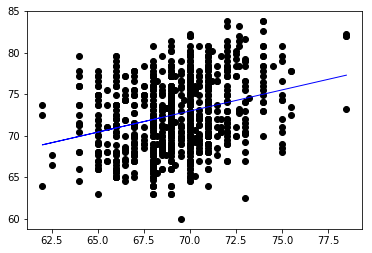

In [55]:
# plot fit line
plt.scatter(x, y,  color='black')
plt.plot(x, skl_lm.predict(x), color='blue', linewidth=1)
plt.show()

*Now it's your turn!* 

can you the regression for 

1. everybody and his/her mother?
2. males and fathers


## death curves since Halley

(Yes, Halley of the comet.) Quantifying morality goes back to the 17th century with the work of Halley:
![Halley table](https://understandinguncertainty.org/sites/understandinguncertainty.org/files/halley-life-table.jpg)

Today we're going to look at how they were put to work to make money, contempoary with our readings


### Survivor curves and making smoothing "real" at the dawn of the 20th Century

In 1905 a New York Lawyer named Charles Evans Hughes put American corporations on trial: namely, the Big 5 insurances companies at the time had steadily raised salaries of high-ranking employees even as policyholder dividends continued to fall [1]. Hughes was tasked with running a state investigation colloquially known as the "Armstrong investigation" to find out why, and began interviewing some of the very people whose high salaries were being questioned. Particularly sensational to the reading public following this "investigation" was the discovery that insurance actuaries did not use the empirically observed number of deaths, expense account balances, or exact annual interests on investiments [2]. Instead insurance companies <b>calculated "smoothed curves" from data, arguing that such smoothed curves more accurately  described reality</b>. Here early 20th C actuaries were borrowing a page from early 19th C astronomers. For astronomers, the mean position of, say, the position of a star in the sky became its *real* position, even if the mean matched no particular observation, as long as the errors of observation could be assumed to be random. This was a kind of smoothing via least squares [3]. Perhaps this makes sense when observing an object in the sky, but did it make sense to treat errors as deviations: to smooth life expectancies, expense sheets, annual investiment interest and treat these as the "correct" values to calculate risk, make business decisions, and mail annuity payments? Many in life insurance thought it did. In fact, some in insurance saw smoothing as a way not merely to describe society and assign individual risk, but even as a means of improving society by attempting to decrease individual statistical risks, as can be seen in this plot in a book co-authored by Louis Dublin, a vice-president of MET Life Insurance Company in 1931 [4]:

![new figure](fig/pg.195.png)

<small>
[1] For a discussion of the Armstrong Investigation, smoothing, and other details discussed above, see chapter 4 in Dan Bouk's _How Our Days Became Numbered_ (2015).
[2] Bouk, 93. 
[3] Desrosières, _The Politics of Large Numbers_ (2002), chapter 3.
[4] Louis Dublin and Alfred Lotka, _Length of life; a study of the life table_, 191-195. 
</small>

<b> In this lab we're going to try out several forms of smoothing in this lab.</b> To begin, let's construct a life expectancy plot like that above. We'll start with three lists which contains the age of death for three different careers: poets, singers, and writers. (Importantly we haven't told you where we got this data so you should immediately be suspicious of this data!)

In [56]:
poet_death = [24,25,26,28,29,29,29,30,32,33,36,36,37,37,37,37,38,38,39,39,39,39,40,41,42,42,
                 42,42,43,44,44,45,45,45,46,46,46,46,46,47,47,47,48,48,49,49,49,50,50,51,51,51,
                 52,52,52,52,52,53,53,53,54,54,55,55,55,55,56,56,56,56,56,57,57,57,58,58,58,58,
                 59,59,59,59,59,60,60,61,61,62,62,62,62,63,64,64,65,65,65,65,66,66,66,66,67,67,
                 67,67,67,68,68,68,68,68,68,68,68,69,69,69,69,69,69,69,69,70,70,70,70,70,71,71,
                 71,71,71,71,71,71,71,72,72,73,73,73,73,73,73,74,74,74,74,74,74,74,74,74,74,75,
                 75,75,75,75,75,76,76,76,77,77,77,77,78,78,78,78,79,79,79,79,79,79,79,80,80,80,
                 80,81,81,81,81,81,81,81,81,81,82,82,83,83,83,83,83,83,83,83,83,84,84,84,84,85,
                 85,85,85,85,85,85,86,86,86,86,87,87,88,88,88,89,89,89,89,89,89,89,90,90,90,91,
                 91,91,93,93,94,101,107]

singer_death = [21,27,30,33,40,42,43,44,45,46,47,52,53,53,53,54,55,57,60,61,65,69,69,70,72,72,
                75,77,78,78,79,80,81,82,83,84,85,88,89,93,96]

writer_death = [29,30,34,38,39,40,40,42,43,44,48,48,50,51,51,52,52,52,54,55,55,55,56,56,57,57,
                57,57,57,58,60,60,60,60,60,61,61,61,62,62,63,63,63,64,64,64,65,65,65,65,65,65,
                66,66,67,67,67,67,68,68,68,69,69,69,70,70,71,71,71,71,71,71,71,72,72,72,73,73,
                74,74,74,75,75,75,75,76,76,76,76,77,77,77,77,77,78,78,78,79,79,79,80,80,80,80,
                81,81,81,81,82,82,82,82,83,83,84,84,85,86,87,88,88,88,89,89,89,90,90,95,95,96,
                50]

We'll also need to import a few libraries! 

In [57]:
# import pandas library, denoting library as "pd"
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# import a bit of ipython "magic" to get graphs to display in jupyter notebook
%pylab inline           

Populating the interactive namespace from numpy and matplotlib


Now let's ingest the data into pandas: 

In [58]:
poet_lifespans=pd.DataFrame(poet_death)
singer_lifespans=pd.DataFrame(singer_death)
writer_lifespans=pd.DataFrame(writer_death)

What's the longest living writer, singer, and poet in the dataset?

In [59]:
print("oldest singer: " + str(singer_lifespans.max().item()))
print("oldest poet: " + str(poet_lifespans.max().item()))
print("oldest writer: "+ str(writer_lifespans.max().item()))

oldest singer: 96
oldest poet: 107
oldest writer: 96


What's happening above? Let's consider just the singers:
1. First we select the max value: 
<code>singer_lifespans.max()</code>
2. Then we pull that value out of the data set as a number via the .item(): 
<code>singer_lifespans.max().item()</code>
3. Finally, we wrap the number in a string so to print out the number: 
<code>str(singer_lifespans.max().item())</code>


Likewise, let's now calculate the life expectancy for these three different professions.  

In [74]:
print("singer life expectancy: " + str(singer_lifespans.mean().item()))
print("poet life expectancy: " + str(poet_lifespans.mean().item()))
print("writer life expectancy: " + str(writer_lifespans.mean().item()))

singer life expectancy: 62.951219512195124
poet life expectancy: 66.26141078838174
writer life expectancy: 68.22900763358778


The curve that we saw Dublin and Lotka provide above is often called a survivor curve. Let's compare the survivor curves for poets, singers, and writers. Let's start with poets. 

What we need to generate a list called "poet_survivors_percentages" in which each element of the list is the percentage of the survivors for a given year:

![poet-survivor-list](fig/poet-survivor-list.jpeg)


We're going to use a for loop to generate this list. Here is what we need to do: 

For age X, running from age 0 to the oldest poet age: 
1. Grab poets alive at age X, i.e., poet_lifespans[poet_lifespans >= age]. 
    All people younger than age X will return NaN, i.e., NaN = "not a number". 
2. Drop all poets who died at younger age (by dropping all NaN elements), i.e., .dropna().
3. Now count up total number of remaining elements, i.e., .size. Note that this is the number of people still alive. 
4. Divide the number of living poets at age X by total number of poets in sample to get fraction of poets alive at age X. 
5. Add this fraction alive at age X to the list "poet_survivors_percentages".
6. Repeat steps 1 - 5 until age X > oldest poet age. 

We need to do the above steps for each profession too. 

Earlier we noticed that the oldest poet lived to 107 years old so we'll want to be sure our x-axis goes to at least 107. Note that the "current_age" list we generate below contains the specific age for each element of the poet_survivor_precentages list. This will be used as x-axis positions for each (y-axis) life expectancy value for a given age and profession. 

In [75]:
# generate survivorship curves for singers, writers, and poets

poet_survivors = []
poet_survivor_percentages = []
singer_survivors = []
singer_survivor_percentages = []
writer_survivors = []
writer_survivor_percentages = []

current_age = []
total_poets = poet_lifespans.size      # total number of poets in sample
total_singers = singer_lifespans.size  # total number of singers in sample 
total_writers = writer_lifespans.size  # total number of writers in sample

for age in range(0, poet_lifespans.max().item()):
    poet_survivors = poet_survivors + [poet_lifespans[poet_lifespans >= age].dropna().size]
    poet_survivor_percentages = poet_survivor_percentages + [poet_survivors[age]/total_poets]
    
    singer_survivors = singer_survivors + [singer_lifespans[singer_lifespans >= age].dropna().size]
    singer_survivor_percentages = singer_survivor_percentages + [singer_survivors[age]/total_singers]
    
    writer_survivors = writer_survivors + [writer_lifespans[writer_lifespans >= age].dropna().size]
    writer_survivor_percentages = writer_survivor_percentages + [writer_survivors[age]/total_writers]
    
    current_age = current_age + [age]

Now we want to put all these survivor percentages into a pandas dataframe:

In [62]:
survivorship_percentages = pd.DataFrame(
                            {"age": current_age,
                            "poet survivor percentage": poet_survivor_percentages,
                            "singer survivor percentage": singer_survivor_percentages, 
                            "writer survivor percentage": writer_survivor_percentages 
                            })

survivorship_percentages

,age,poet survivor percentage,singer survivor percentage,writer survivor percentage
0,0,1.000000,1.000000,1.000000
1,1,1.000000,1.000000,1.000000
2,2,1.000000,1.000000,1.000000
3,3,1.000000,1.000000,1.000000
4,4,1.000000,1.000000,1.000000
5,5,1.000000,1.000000,1.000000
6,6,1.000000,1.000000,1.000000
7,7,1.000000,1.000000,1.000000
8,8,1.000000,1.000000,1.000000
9,9,1.000000,1.000000,1.000000


Now let's graph these survivor curves for each profession:

Text(0,0.5,'percentage still living')

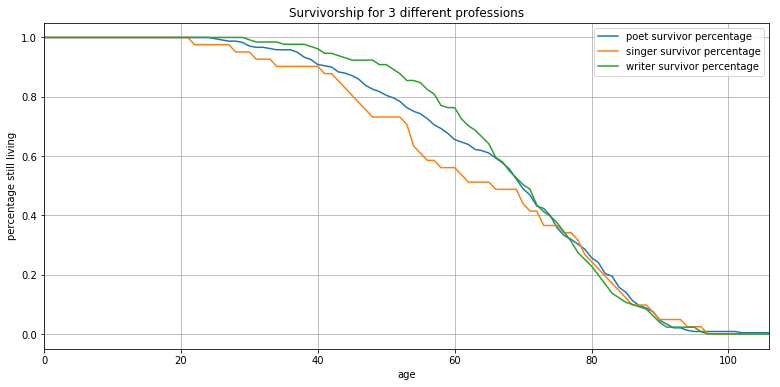

In [63]:
survivorship_percentages.plot(x="age", y=["poet survivor percentage", "singer survivor percentage", 
                              "writer survivor percentage"], figsize=[13,6],
                              title="Survivorship for 3 different professions", grid =True)
plt.ylabel('percentage still living')

The above is the same survivor graph as Dublin and Lotka provided above. <b>What information does this graph propose to present?</b> If we choose to use the above graph to predict the future rather than to merely describe the past, which profession (or professions) should you choose to maximize your life (assuming your only 3 options are between being a singer, poet, or writer)? What are the (many) problems with trying to predict the future with this graph?

<b> Now let's return to survivor curves and smoothing. </b> Recall the following plot from above, and pay special attention to what's happening to the singers.

Text(0,0.5,'percentage still living')

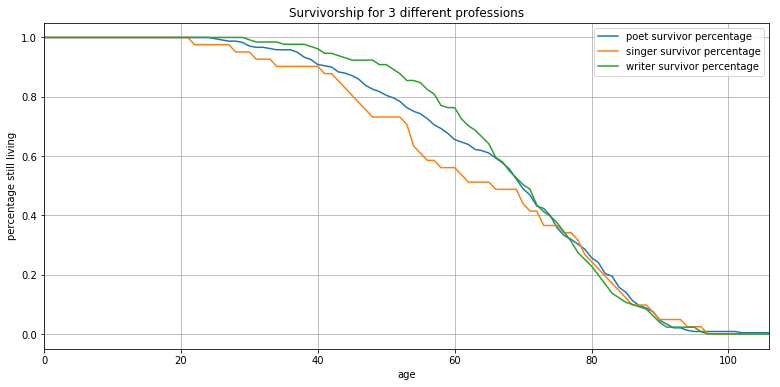

In [64]:
survivorship_percentages.plot(x="age", y=["poet survivor percentage", "singer survivor percentage", 
                              "writer survivor percentage"], figsize=[13,6],
                              title="Survivorship for 3 different professions", grid =True)
plt.ylabel('percentage still living')


Note how from approximately ages 22 to 75, the graph suggests you're more likely to die if you're a singer, but if you make it to your early 90s you're more likely to be alive than either poets or writers. What's going on here?

In [65]:
# HINT
print(poet_lifespans.size)
print(singer_lifespans.size)
print(writer_lifespans.size)

241
41
131


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a17ad5240>]], dtype=object)

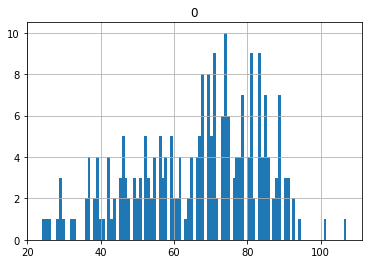

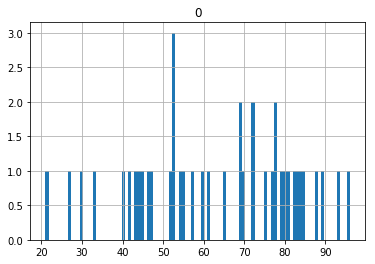

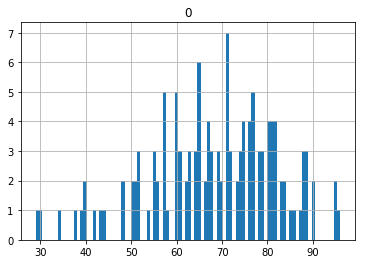

In [66]:
# ANOTHER HINT
poet_lifespans.hist(bins=poet_lifespans.max().item())
singer_lifespans.hist(bins=singer_lifespans.max().item())
writer_lifespans.hist(bins=writer_lifespans.max().item())

When actuaries at the outset of the 20th C turned to smoothing, they did so in part out of a practical necessity of having highly variable data. Yet this was not the only reason. Just as bankers in the 1830s turned to smoothing to hide the extreme daily and weekly variation so as to prevent a bank run, so too did actuaries make use of smoothing to emphasize regularity rather than chance [4]. 


<small>[4] Bouk, _How Our Days Became Numbered_ (2015), 94-95, 100-101.</small>

Let's try our hand at smoothing our survival curves. First we have to average together sets of lifespans for each profession. Let's average 3 deaths at a time. 

In [67]:
# SMOOTH POET DEATHS
smoothed_poet_death = []
for set_of_3 in range(0, len(poet_death), 3): 
    if set_of_3 not in {237, 240}:
        smoothed_poet_death = smoothed_poet_death + [(poet_death[set_of_3]
                                                      + poet_death[set_of_3+1]
                                                      + poet_death[set_of_3+2]
                                                     )/3]  
    elif set_of_3 == 237:
        # Here we avg 4 instead of 3 death ages
        smoothed_poet_death = smoothed_poet_death + [(poet_death[set_of_3]
                                                      + poet_death[set_of_3+1]
                                                      + poet_death[set_of_3+2]
                                                      + poet_death[set_of_3+3]
                                                     )/4]  

# SMOOTH SINGER DEATHS
smoothed_singer_death = []
for set_of_3 in range(0, len(singer_death), 3):
    if set_of_3 not in {39}:
        smoothed_singer_death = smoothed_singer_death + [(singer_death[set_of_3]
                                                          + singer_death[set_of_3+1]
                                                          + singer_death[set_of_3+2]
                                                         )/3] 
    elif set_of_3 == 39:
        # Here we avg 2 instead of 3 death ages
        smoothed_singer_death = smoothed_singer_death + [(singer_death[set_of_3]
                                                          + singer_death[set_of_3+1]
                                                         )/2] 

        
        
# SMOOTH WRITER DEATHS
smoothed_writer_death = []
for set_of_3 in range(0, len(writer_death), 3): 
    if set_of_3 not in {129}:
        smoothed_writer_death = smoothed_writer_death + [(writer_death[set_of_3]
                                                          + writer_death[set_of_3+1]
                                                          + writer_death[set_of_3+2]
                                                         )/3]  
    elif set_of_3 == 126:
        # Here we avg 5 instead of 3 death ages
        smoothed_writer_death = smoothed_writer_death + [(writer_death[set_of_3]
                                                          +writer_death[set_of_3+1]
                                                          +writer_death[set_of_3+2]
                                                          +writer_death[set_of_3+3]
                                                          +writer_death[set_of_3+4]
                                                         )/5]  


Now that we have the smoothed data, we how does our calculated life expectancy change?

In [68]:
s_poet_lifespans=pd.DataFrame(smoothed_poet_death)
s_singer_lifespans=pd.DataFrame(smoothed_singer_death)
s_writer_lifespans=pd.DataFrame(smoothed_writer_death)

print("singer life expectancy: " + str(singer_lifespans.mean().item()))
print("poet life expectancy: " + str(poet_lifespans.mean().item()))
print("writer life expectancy: " + str(writer_lifespans.mean().item()))

print("smoothed singer life expectancy: " + str(s_singer_lifespans.mean().item()))
print("smoothed poet life expectancy: " + str(s_poet_lifespans.mean().item()))
print("smoothed writer life expectancy: " + str(s_writer_lifespans.mean().item()))

singer life expectancy: 62.951219512195124
poet life expectancy: 66.26141078838174
writer life expectancy: 68.22900763358778
smoothed singer life expectancy: 63.702380952380956
smoothed poet life expectancy: 66.12604166666668
smoothed writer life expectancy: 68.15503875968994


So smoothing doesn't make too big of difference with our data averages. Let's compare our smoothed survivor curves to our original survivor curves. We do the same thing as we did before, but add "s" to denote we're now working with smoothed data.

In [69]:
# generate survivorship curves for singers, writers, and poets using *smoothed data*

s_poet_survivors = []
s_poet_survivor_percentages = []
s_singer_survivors = []
s_singer_survivor_percentages = []
s_writer_survivors = []
s_writer_survivor_percentages = []

s_total_poets = s_poet_lifespans.size      # total number of avg data in poets sample
s_total_singers = s_singer_lifespans.size  # total number of avg data in singers sample 
s_total_writers = s_writer_lifespans.size  # total number of avg data in writers sample

for age in range(0, poet_lifespans.max().item()):
    s_poet_survivors = s_poet_survivors + [s_poet_lifespans[s_poet_lifespans >= age].dropna().size]   
    s_poet_survivor_percentages = s_poet_survivor_percentages + [s_poet_survivors[age]/s_total_poets]
    
    s_singer_survivors = s_singer_survivors + [s_singer_lifespans[s_singer_lifespans >= age].dropna().size]
    s_singer_survivor_percentages = s_singer_survivor_percentages + [s_singer_survivors[age]/s_total_singers]
    
    s_writer_survivors = s_writer_survivors + [s_writer_lifespans[s_writer_lifespans >= age].dropna().size]
    s_writer_survivor_percentages = s_writer_survivor_percentages + [s_writer_survivors[age]/s_total_writers]

In [70]:
survivorship_percentages_smoothed = pd.DataFrame(
                            {"age": current_age,
                            "poet survivor %": poet_survivor_percentages,
                            "singer survivor %": singer_survivor_percentages, 
                            "writer survivor %": writer_survivor_percentages,
                            "poet survivor % (smoothed)": s_poet_survivor_percentages,
                            "singer survivor % (smoothed)": s_singer_survivor_percentages, 
                            "writer survivor % (smoothed)": s_writer_survivor_percentages,
                            })

survivorship_percentages_smoothed

,age,poet survivor %,poet survivor % (smoothed),singer survivor %,singer survivor % (smoothed),writer survivor %,writer survivor % (smoothed)
0,0,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000
1,1,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000
2,2,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000
3,3,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000
4,4,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000
5,5,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000
6,6,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000
7,7,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000
8,8,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000
9,9,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000


Now let's compare our smoothed curves with our original curves! (Note we make these graphs a little bigger to facilitate visual inspection.) 

Text(0,0.5,'percentage still living')

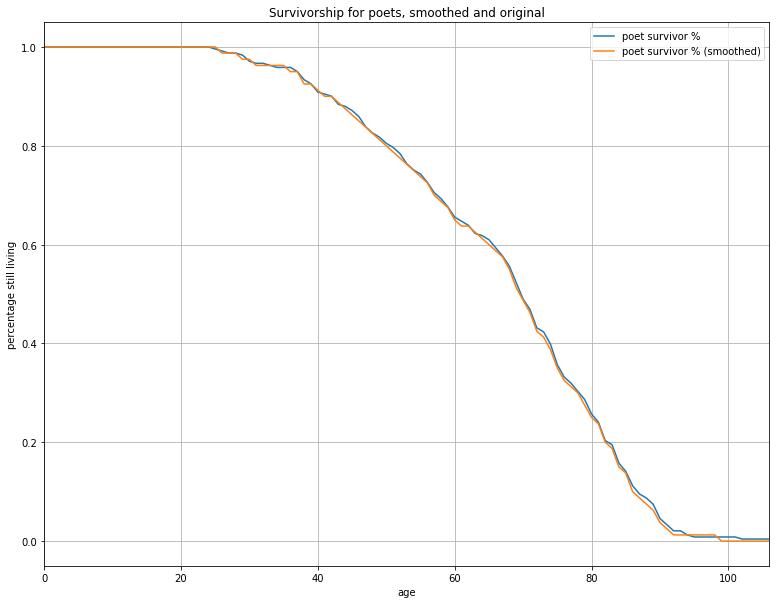

In [71]:
survivorship_percentages_smoothed.plot(x="age", y=["poet survivor %", "poet survivor % (smoothed)"], 
                                       figsize=[13,10], title="Survivorship for poets, smoothed and original", 
                                       grid =True)
plt.ylabel('percentage still living')

Text(0,0.5,'percentage still living')

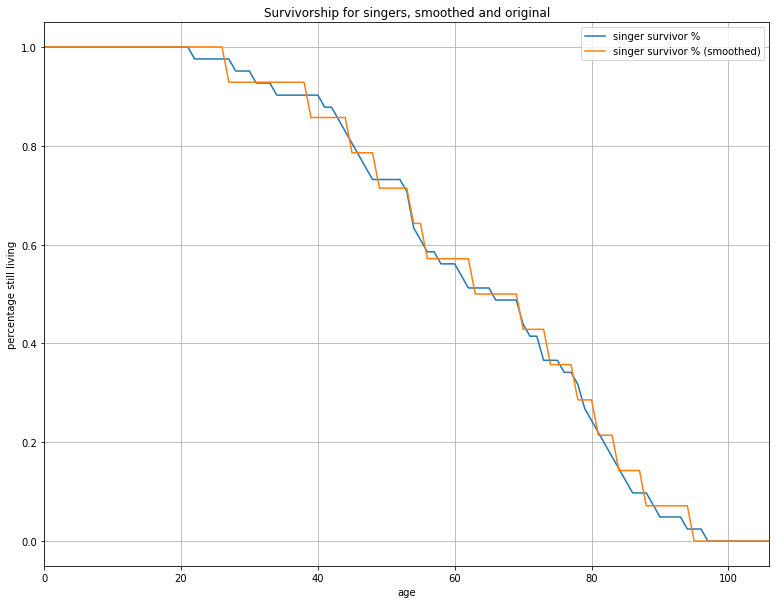

In [72]:
survivorship_percentages_smoothed.plot(x="age",  y=["singer survivor %", "singer survivor % (smoothed)"], 
                                       figsize=[13,10], title="Survivorship for singers, smoothed and original", 
                                       grid =True)
plt.ylabel('percentage still living')

Text(0,0.5,'percentage still living')

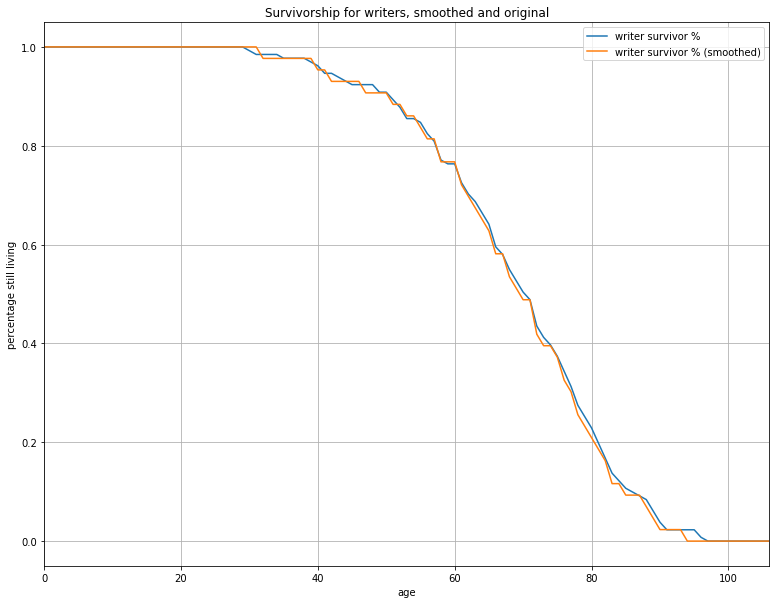

In [73]:
survivorship_percentages_smoothed.plot(x="age",  y=["writer survivor %", "writer survivor % (smoothed)"], 
                                       figsize=[13,10], title="Survivorship for writers, smoothed and original", 
                                       grid =True)
plt.ylabel('percentage still living')

It's not clear from visual inspection that survivor curve for the smoothed poets' data is much smoother than our original data. Ditto for our writers. And the survivor curve for our singers became *less* smooth, not more. <b>What's going on here?</b> (HINT: There's no error in the code...) 